In [19]:
from sklearn import linear_model
import pickle
from scipy import stats
import pandas as pd

with open('train.pickle', 'rb') as r:
    train = pickle.load(r)
with open('test.pickle', 'rb') as r:
    test = pickle.load(r)
    
features = [f for f in train if f not in ['air_store_id', 'visit_date', 'visitors']]
train_size = int(len(train)*0.7)
test_size = len(train) - train_size
input_train = train[features][0:train_size]
input_test = train[features][train_size:len(train)]
train_visitors = train.visitors.values[0:train_size]
test_visitors = train.visitors.values[train_size:len(train)]

reg = linear_model.Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
reg.fit(input_train, train_visitors)
pred_lasso01 = reg.predict(input_test)


In [21]:
   
features = [f for f in train if f not in ['air_store_id', 'visit_date', 'visitors']]
input_train = train[features]
input_test = test[features]
train_visitors = train.visitors.values
test_visitors = test.visitors.values

reg = linear_model.Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
reg.fit(input_train, train_visitors)
pred_lasso1 = reg.predict(input_test)

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
mean_squared_error(test_visitors, pred_lasso1)

561.4123668752987

In [34]:
import csv
test['visitors'] = pred_lasso1
sub_lasso1 = test[['id', 'visitors']].copy()
sub_lasso1.to_csv('sub_lasso1.csv', index=False)

In [33]:
test.head()

,id,visitors,visit_date,air_store_id,dow,year,month,day_of_week,holiday_flg,min_visitors,...,air_genre_name9,air_area_name9,sum of diff_x,sum of res vistors_x,mean of diff_x,mean of res visitors_x,sum of diff_y,sum of res vistors_y,mean of diff_y,mean of res visitors_y
0,air_00a91d42b08b08d9_2017-04-23,1.744458,2017-04-23,air_00a91d42b08b08d9,6,2017,4,3,0,2.0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,air_00a91d42b08b08d9_2017-04-24,21.361782,2017-04-24,air_00a91d42b08b08d9,0,2017,4,1,0,1.0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,air_00a91d42b08b08d9_2017-04-25,23.297868,2017-04-25,air_00a91d42b08b08d9,1,2017,4,5,0,1.0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,air_00a91d42b08b08d9_2017-04-26,27.241731,2017-04-26,air_00a91d42b08b08d9,2,2017,4,6,0,15.0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,air_00a91d42b08b08d9_2017-04-27,28.882264,2017-04-27,air_00a91d42b08b08d9,3,2017,4,4,0,15.0,...,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


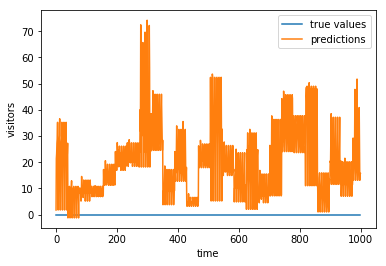

In [24]:
trueV, = plt.plot(test_visitors[0:1000])
predV, = plt.plot(pred_lasso1[0:1000])
plt.xlabel('time')
plt.ylabel('visitors')
plt.legend([trueV, predV], ['true values', 'predictions'])
plt.show()

In [12]:
with open('svm_test_C10_gamma0_001.pickle', 'rb') as r:
    pred_svm1 = pickle.load(r)
mean_squared_error(test_visitors, pred_svm1)

293.4964017894642

In [20]:
with open('lasso_test_alpha0_1.pickle', 'wb') as w:
    pickle.dump(pred_lasso01, w)

In [1]:
import pickle
with open('lasso_test_alpha0_01.pickle', 'rb') as r:
    alpha001 = pickle.load(r)
with open('train.pickle', 'rb') as r:
    train = pickle.load(r)
with open('lasso_test_alpha1.pickle', 'rb') as r:
    alpha1 = pickle.load(r)
with open('lasso_test_alpha0_1.pickle', 'rb') as r:
    alpha01 = pickle.load(r)

In [2]:
features = [f for f in train if f not in ['air_store_id', 'visit_date', 'visitors']]
train_size = int(len(train)*0.7)
test_size = len(train) - train_size
input_train = train[features][0:train_size]
input_test = train[features][train_size:len(train)]
train_visitors = train.visitors.values[0:train_size]
test_visitors = train.visitors.values[train_size:len(train)]

<Figure size 432x288 with 0 Axes>

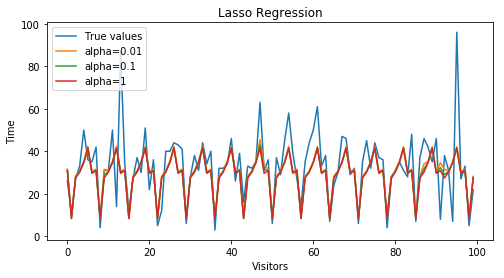

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
trueV, = plt.plot(test_visitors[0:100])
pred_001, = plt.plot(alpha001[0:100])
pred_01, = plt.plot(alpha01[0:100])
pred_1, = plt.plot(alpha1[0:100])
plt.xlabel('Visitors')
plt.ylabel('Time')
plt.title('Lasso Regression')
plt.legend([trueV, pred_001, pred_01, pred_1], ['True values', 'alpha=0.01', 'alpha=0.1', 'alpha=1'], loc='upper left')
plt.savefig('lasso.png')
plt.show()


In [24]:
pred_001

In [25]:
from sklearn.metrics import mean_squared_error
error001 = mean_squared_error(test_visitors, alpha001)
error01 = mean_squared_error(test_visitors, alpha01)
error1 = mean_squared_error(test_visitors, alpha1)

In [26]:
error001

104.13606516423589

In [27]:
error01

104.41088588523264

In [28]:
error1

105.08655010682384